Business Problem

 The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the
 company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are
 differences across the product with respect to customer characteristics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_csv("/content/drive/MyDrive/CSV datasets/Aerofit.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [45]:
df.shape

(180, 9)

In [46]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
# Convert column names to a list:
# columns.tolist():converting the column Indexs  to a list for easy access
# Display the lists of columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)
# Calculate the mean and standard deviation for numerical columns
numerical_means = df[numerical_columns].mean()
numerical_stds = df[numerical_columns].std()
print("\nMean values for numerical columns:")
print(numerical_means)
print("\nStandard deviation values for numerical columns:")
print(numerical_stds)
# Display value counts for categorical columns
print("\nValue counts for categorical columns:")
for column in categorical_columns:

    print(f"\n{column} value counts:")
    print(df[column].value_counts())

Numerical columns: ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
Categorical columns: ['Product', 'Gender', 'MaritalStatus']

Mean values for numerical columns:
Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

Standard deviation values for numerical columns:
Age              6.943498
Education        1.617055
Usage            1.084797
Fitness          0.958869
Income       16506.684226
Miles           51.863605
dtype: float64

Value counts for categorical columns:

Product value counts:
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Gender value counts:
Gender
Male      104
Female     76
Name: count, dtype: int64

MaritalStatus value counts:
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


In [47]:
#conversion of categorical attributes to 'category' (If required)
for column in categorical_columns:
    df[column] = df[column].astype('category')
    print(df.dtypes)

Product          category
Age                 int64
Gender             object
Education           int64
MaritalStatus      object
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object
Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus      object
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object
Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object


 Convereted object data types into categorical types

 object---use more memory

 category---use less memory

In [48]:
df.describe()#summary of statistics for numerical columns

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [49]:
 #Checking the characteristics of the data:
 df.describe(include = 'all')#summary of statistics for (numerical columns + categorical columns)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


 Observations:

 There are no missing values in the data.

 There are 3 unique products in the dataset.

 KP281 is the most frequent product.

 Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.

 Most of the people are having 16 years of education i.e., 75% of persons are having education <= 16 years.

 Out of 180 data points, 104's gender is Male and rest are the female.

 Standard deviation for Income & Miles is very high. These variables might have the outliers in it

# Non-Graphical Analysis: Value counts and unique attributes

In [50]:
 #Value counts
 df.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Name: count, Length: 180, dtype: int64

In [17]:
 df['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


out of 7days in a week :

 1.69 cus used the treadmill 3 times/week.

 2.52 cus used the treadmill 4 times/week.

 3.similary remaining

 4.only 2 cus used the treadmill 7 times/week

In [18]:
 # Use value_counts() on a specific column
 df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [19]:
 # Check for null values in the DataFrame
 null_counts = df.isnull().sum() # or df.isna()
 print(null_counts)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


df.isnull(): Use to check for missing values and understand where they are located in the DataFrame.

df.isnull().sum(): Use to get a quick summary of the number of missing values in each column

Observations:

 There are no missing values in the data.

In [21]:
# Check for unique values in the DataFrame
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [22]:
 unique_values = df['Product'].unique()
 print(unique_values)

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']


In [23]:
 df['Product'].nunique()

3

In [24]:
 print(unique_values)

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']


In [25]:
df['Age'].nunique()

32

Unique---what are the unique values in a feature

nunique...No of unique values (i.e..count of unique values)

value_counts...To get frequency of values(no of times a value repeating)

Univariate analysis

 count plot


 Quantitative data : counted or measured or numerical value.

<Axes: xlabel='Fitness', ylabel='count'>

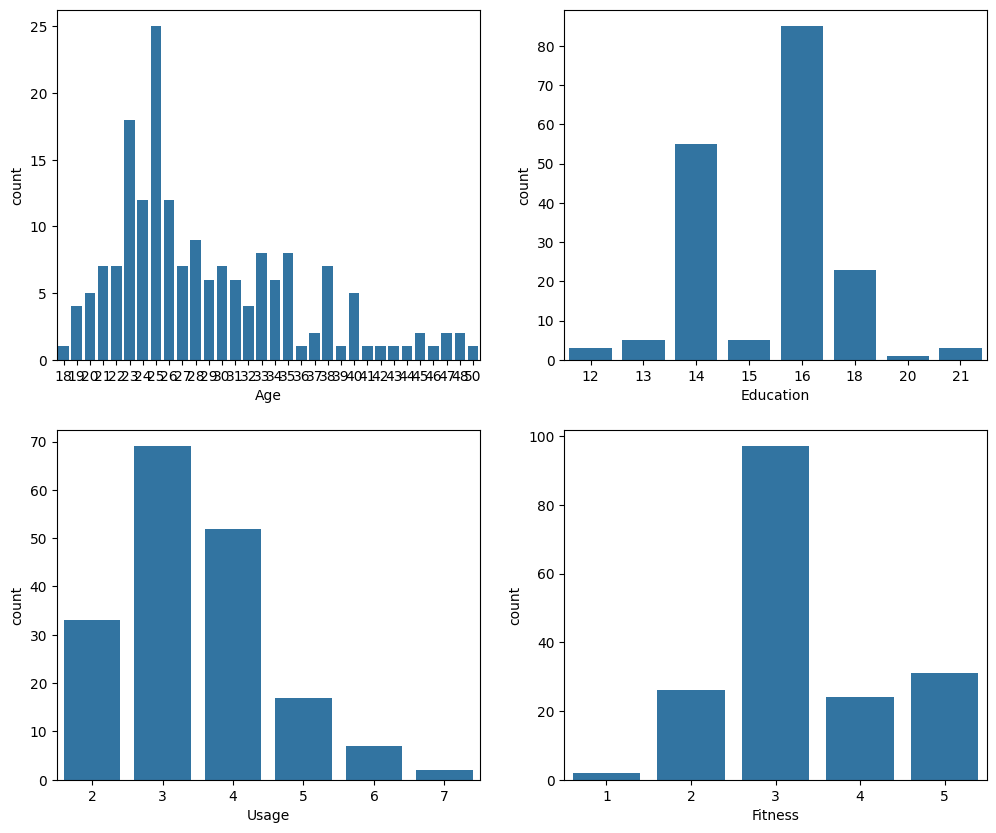

In [26]:
 fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
 sns.countplot(data=df, x='Age', ax=axs[0,0])
 sns.countplot(data=df, x='Education', ax=axs[0,1])
 sns.countplot(data=df, x='Usage', ax=axs[1,0])
 sns.countplot(data=df, x='Fitness', ax=axs[1,1])

 Qualitative data : descriptive data

1. Product

2. Gender

3. MaritalStatus

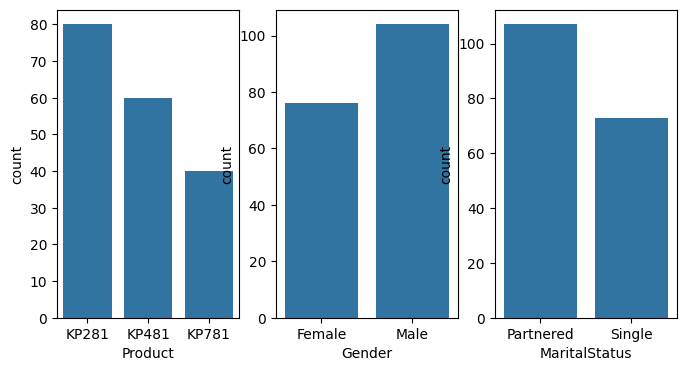

In [27]:
 fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8,4))
 sns.countplot(data=df, x='Product', ax=axs[0])
 sns.countplot(data=df, x='Gender', ax=axs[1])
 sns.countplot(data=df, x='MaritalStatus', ax=axs[2])
 plt.show()

 Observations:

 1.KP281 is the most frequent product.

 2.There are more Males in the data than Females.

 3.More Partnered persons are there in the data.

histplot/dist plot

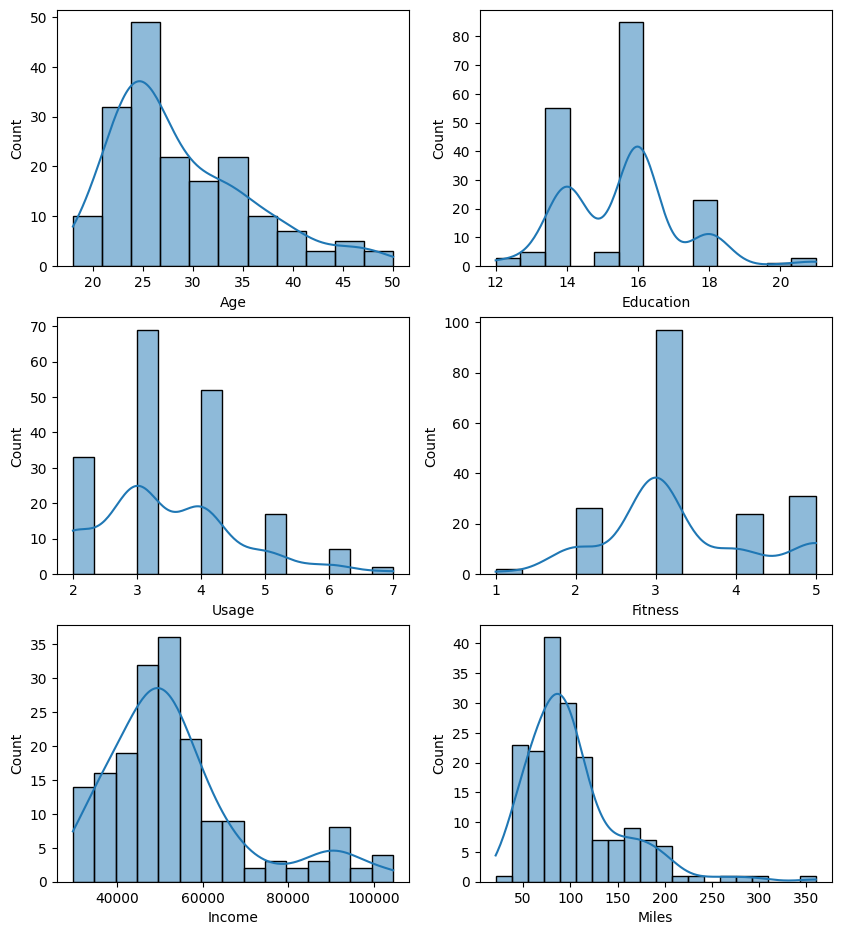

In [28]:
 fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
 fig.subplots_adjust(top=1.2)
 sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
 sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
 sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
 sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
 sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
 sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
 plt.show()

For categorical variable(s): Boxplot


DataFrame without outliers:
           A          B
0  54.531112  27.499912
1  47.719781  18.918829
2  54.679580  34.520249
3  55.177609  25.846704
5  38.723414  27.915388


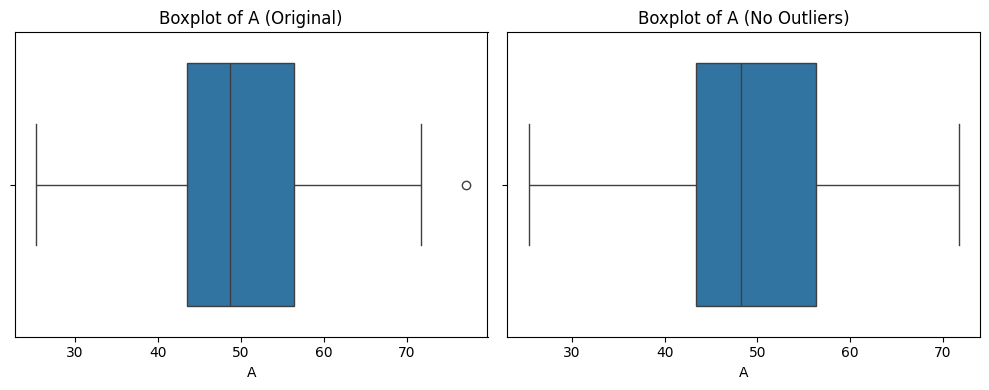

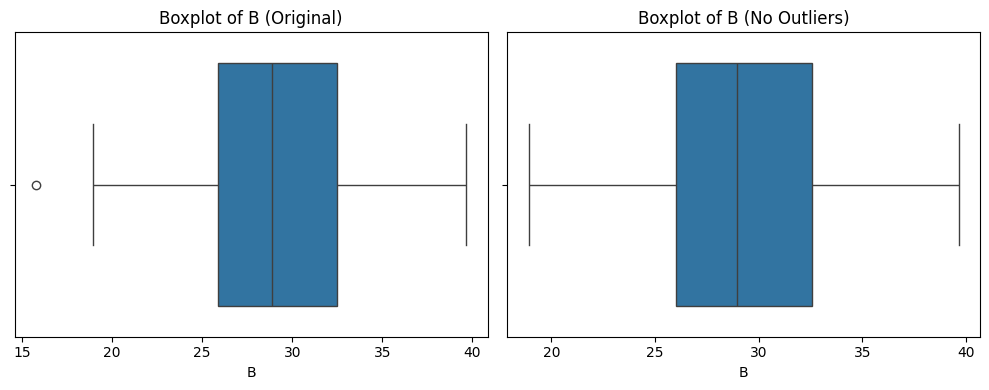

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numerical columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Load your DataFrame here (example placeholder)
df = pd.DataFrame({  # Example data
    'A': np.random.randn(100) * 10 + 50,
    'B': np.random.randn(100) * 5 + 30
})

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove outliers for all numerical columns
df_no_outliers = df.copy()
for column in numerical_columns:
    df_no_outliers = remove_outliers(df_no_outliers, column)

# Display the DataFrame without outliers
print("\nDataFrame without outliers:")
print(df_no_outliers.head())

# Function to create side-by-side boxplots for numerical columns
def plot_side_by_side(df, df_no_outliers, column):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    # Original data boxplot
    sns.boxplot(x=df[column], ax=axes[0])
    axes[0].set_title(f'Boxplot of {column} (Original)')

    # Data without outliers boxplot
    sns.boxplot(x=df_no_outliers[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column} (No Outliers)')

    plt.tight_layout()
    plt.show()

# Plot side-by-side for each numerical column
for column in numerical_columns:
    plot_side_by_side(df, df_no_outliers, column)


 Outlier Removal:

 Removes extreme values entirely.

 Reduces dataset size.

 May result in loss of valuable information.

 Clipping:

 Adjusts extreme values to boundary values.

 Preserves dataset size.

 Reduces the impact of extreme values without discarding data.

Clipping--Adjusting O/L pts to 5 and 95% without removing those pts which may
 contain useful info


5th and 95th percentiles:
              A          B
0.05  33.178274  22.073525
0.95  67.208000  36.069745

Clipped DataFrame for numerical columns:
           A          B
0  54.531112  27.499912
1  47.719781  22.073525
2  54.679580  34.520249
3  55.177609  25.846704
4  53.985429  22.073525


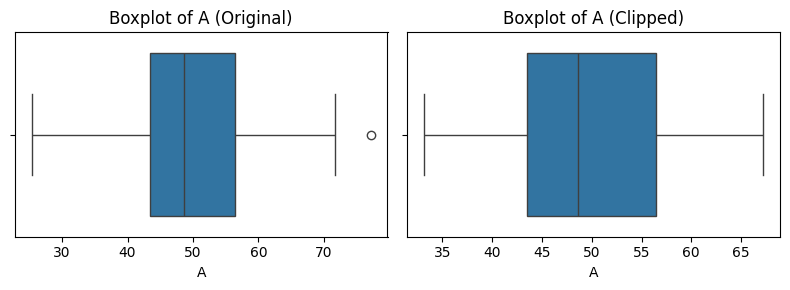

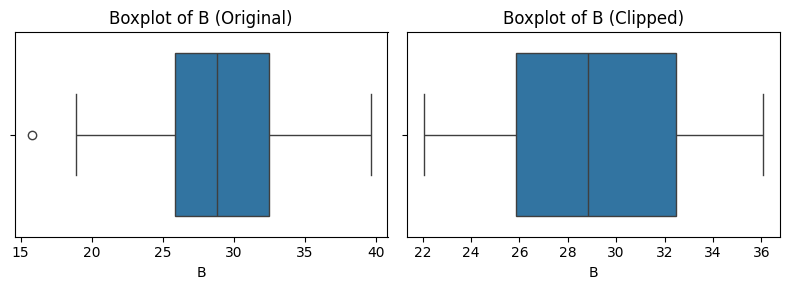

In [31]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
# Calculate the 5th and 95th percentiles for numerical columns
percentiles = df[numerical_columns].quantile([0.05, 0.95])
print("\n5th and 95th percentiles:")
print(percentiles)
# Clip the data between the 5th and 95th percentiles for numerical columns
clipped_df = df.copy()
for column in numerical_columns:
    lower_bound = percentiles.loc[0.05, column]
    upper_bound = percentiles.loc[0.95, column]
    clipped_df[column] = np.clip(df[column], lower_bound, upper_bound)
# Display the clipped DataFrame
print("\nClipped DataFrame for numerical columns:")
print(clipped_df.head())
# Function to create side-by-side boxplots for numerical columns
def plot_side_by_side(df, clipped_df, column):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
    # Original data boxplot
    sns.boxplot(x=df[column], ax=axes[0])
    axes[0].set_title(f'Boxplot of {column} (Original)')
    # Clipped data boxplot
    sns.boxplot(x=clipped_df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column} (Clipped)')
    plt.tight_layout()
    plt.show()
# Function to plot value counts for categorical columns
def plot_value_counts(df, column):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[column])
    plt.title(f'Value Counts of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
# Plot side-by-side for each numerical column
for column in numerical_columns:
    plot_side_by_side(df, clipped_df, column)

Clipping data in the context of a box plot means adjusting the data to limit the in uence of extreme outliers

In [32]:
 # Calculate the mean and standard deviation for numerical columns
 numerical_means = df[numerical_columns].mean()
 numerical_stds = df[numerical_columns].std()
 print("\nMean values for numerical columns:")
 print(numerical_means)
 print("\nStandard deviation values for numerical columns:")
 print(numerical_stds)


Mean values for numerical columns:
A    49.945339
B    29.140255
dtype: float64

Standard deviation values for numerical columns:
A    10.169437
B     4.481544
dtype: float64


In [51]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

 Product

 44.44% of the customers have purchased KP2821 product.

 33.33% of the customers have purchased KP481 product.

 22.22% of the customers have purchased KP781 product.

 Gender

 57.78% of the customers are Male.

 MaritalStatus

 59.44% of the customers are Partnered.

 Bivariate Analysis:

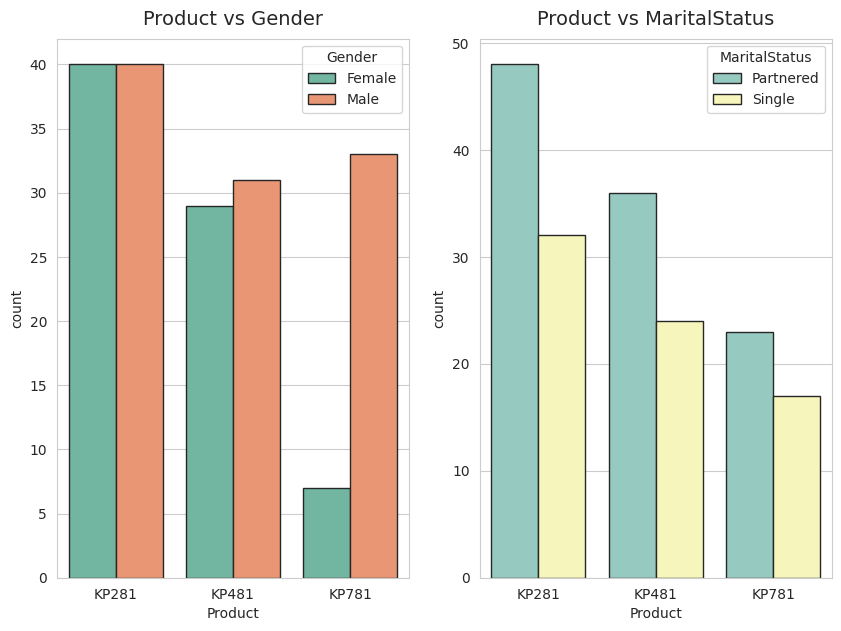

In [52]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15",palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus',edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

 Observations:

 Product vs Gender

 Equal number of males and females have purchased KP281 product and Almost same for the product KP481

 Most of the Male customers have purchased the KP781 product.
  
Product vs MaritalStatus
 Customer who is Partnered, is more likely to purchase the product

Checking if following features have any effect on the product purchased:

 1. Age

 2. Education

 3. Usage

 4. Fitness

 5. Income

 6. Miles

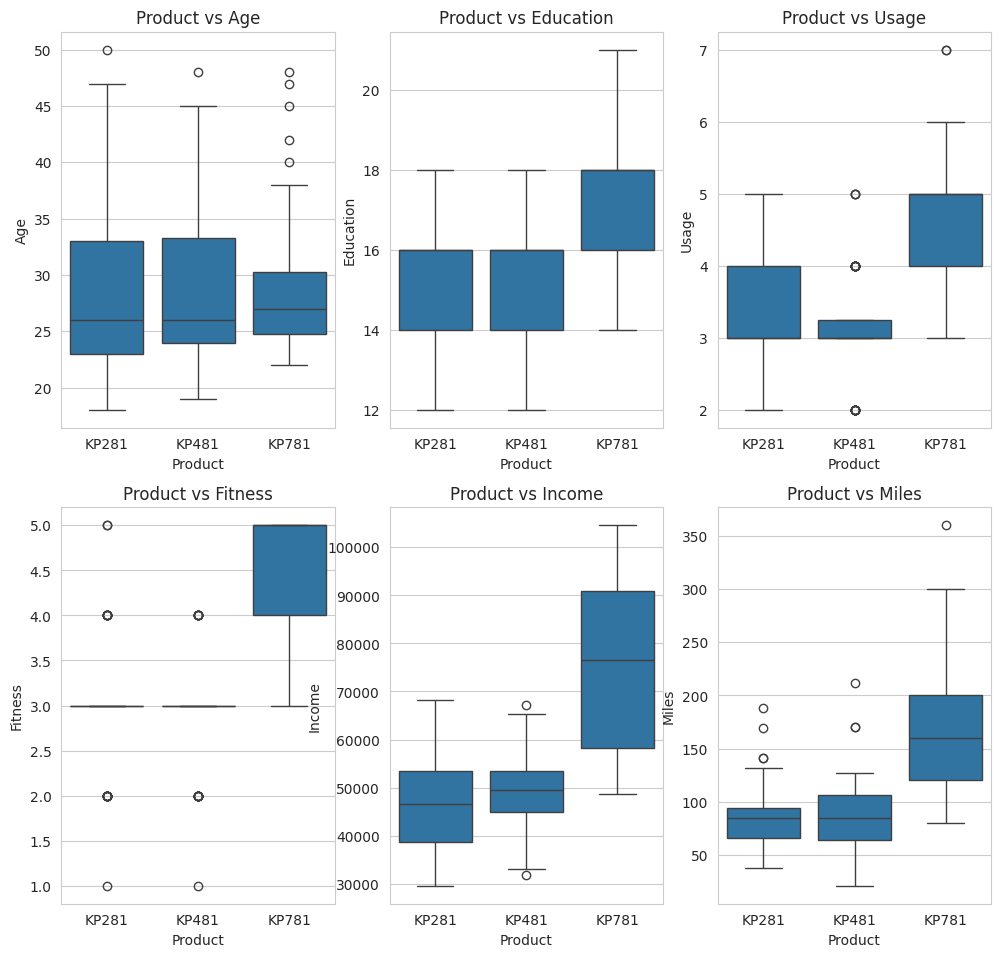

In [53]:
 attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income','Miles']
 fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
 fig.subplots_adjust(top=1.2)
 count = 0
 for i in range(2):
  for j in range(3):
    sns.boxplot(data=df, x='Product', y=attrs[count],ax=axs[i,j])
    axs[i,j].set_title(f"Product vs {attrs[count]}")
    count += 1

 1. Product vs Age

 Customers purchasing products KP281 & KP481 are having same Age median value.

 Customers whose age lies between 25-30, are more likely to buy KP781 product

 2. Product vs Education

 Customers whose Education is greater than 16, have more chances to purchase the KP781 product.

 While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

 3. Product vs Usage

 Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.

 While the other customers are likely to purchasing KP281 or KP481.

 4. Product vs Fitness

 The more the customer is t ( tness >= 3), higher the chances of the customer to purchase the KP781 product.

 5. Product vs Income

 Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

 6. Product vs Miles

 If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product

Multivariate analysis:

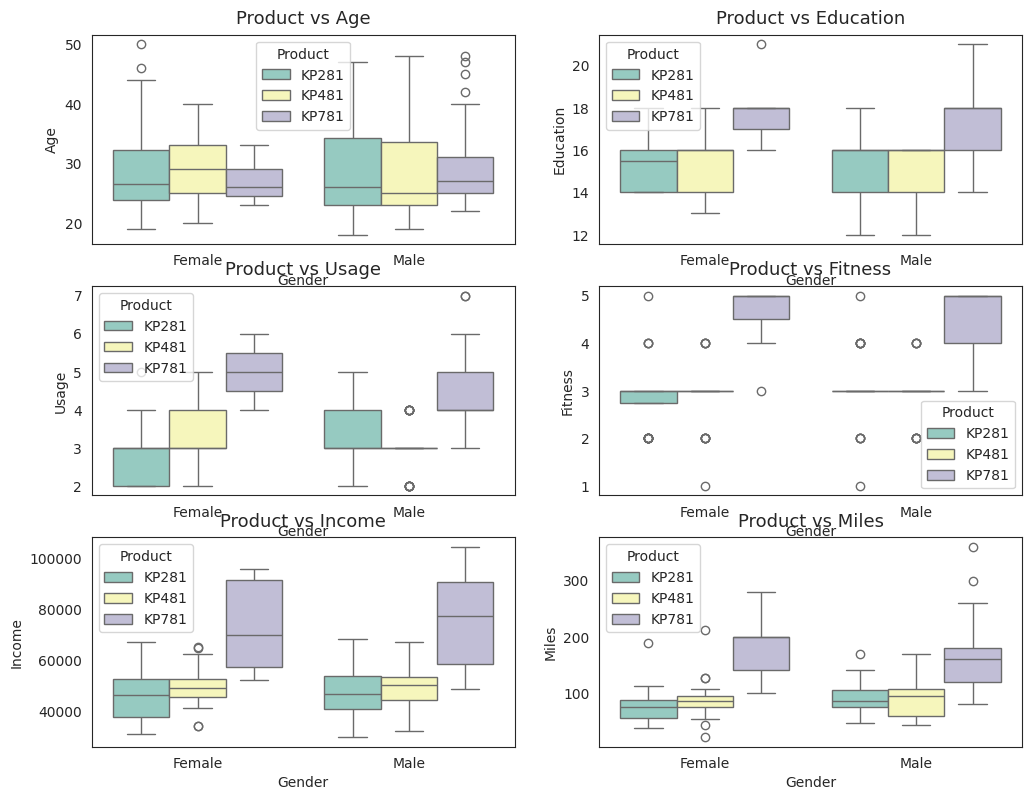

In [54]:
 attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
 sns.set_style("white")
 fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
 fig.subplots_adjust(top=1)
 count = 0
 for i in range(3):
  for j in range(2):
    sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product',ax=axs[i,j], palette='Set3')
    axs[i,j].set_title(f"Product vs {attrs[count]}", pad=8,fontsize=13)
    count += 1

 Observations:

 Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product

Computing Marginal & Conditional Probabilities:

Marginal probability of an event is simply its frequency divided by the total count.

In [56]:
# Marginal probability of categorical variables
for col in ['Product', 'Gender', 'Education', 'MaritalStatus']:
    print(f"\nMarginal Probabilities for {col}:")
    print(df[col].value_counts(normalize=True))  # Normalized to get probabilities



Marginal Probabilities for Product:
Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

Marginal Probabilities for Gender:
Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

Marginal Probabilities for Education:
Education
16    0.472222
14    0.305556
18    0.127778
15    0.027778
13    0.027778
12    0.016667
21    0.016667
20    0.005556
Name: proportion, dtype: float64

Marginal Probabilities for MaritalStatus:
MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64


For numerical columns, convert them into bins before computing probabilities:

In [57]:
# Example: Marginal probability for Age
df['Age_bin'] = pd.cut(df['Age'], bins=5)  # Adjust bins as needed
print("\nMarginal Probabilities for Age:")
print(df['Age_bin'].value_counts(normalize=True))



Marginal Probabilities for Age:
Age_bin
(24.4, 30.8]      0.366667
(17.968, 24.4]    0.300000
(30.8, 37.2]      0.194444
(37.2, 43.6]      0.088889
(43.6, 50.0]      0.050000
Name: proportion, dtype: float64


Compute Conditional Probabilities

Conditional probability P(A/B) is the probability of event A given that event B has occurred.

In [58]:
# Conditional probability: P(Gender | Product)
cond_prob = df.groupby('Product')['Gender'].value_counts(normalize=True).unstack()
print("\nConditional Probability P(Gender | Product):\n", cond_prob)



Conditional Probability P(Gender | Product):
 Gender     Female      Male
Product                    
KP281    0.500000  0.500000
KP481    0.483333  0.516667
KP781    0.175000  0.825000


<ipython-input-58-1249718a9a96>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cond_prob = df.groupby('Product')['Gender'].value_counts(normalize=True).unstack()


In [59]:
# Bin Income for categorical probability
df['Income_bin'] = pd.qcut(df['Income'], q=4)  # Quartiles

# Compute P(Income | Education)
cond_prob_income_edu = df.groupby('Education')['Income_bin'].value_counts(normalize=True).unstack()
print("\nConditional Probability P(Income | Education):\n", cond_prob_income_edu)



Conditional Probability P(Income | Education):
 Income_bin  (29561.999, 44058.75]  (44058.75, 50596.5]  (50596.5, 58668.0]  \
Education                                                                    
12                       0.666667             0.333333            0.000000   
13                       0.600000             0.200000            0.200000   
14                       0.400000             0.363636            0.218182   
15                       0.800000             0.000000            0.000000   
16                       0.164706             0.247059            0.341176   
18                       0.000000             0.086957            0.130435   
20                       0.000000             0.000000            0.000000   
21                       0.000000             0.000000            0.000000   

Income_bin  (58668.0, 104581.0]  
Education                        
12                     0.000000  
13                     0.000000  
14                     0.018182  


Visualizing Conditional Probabilities

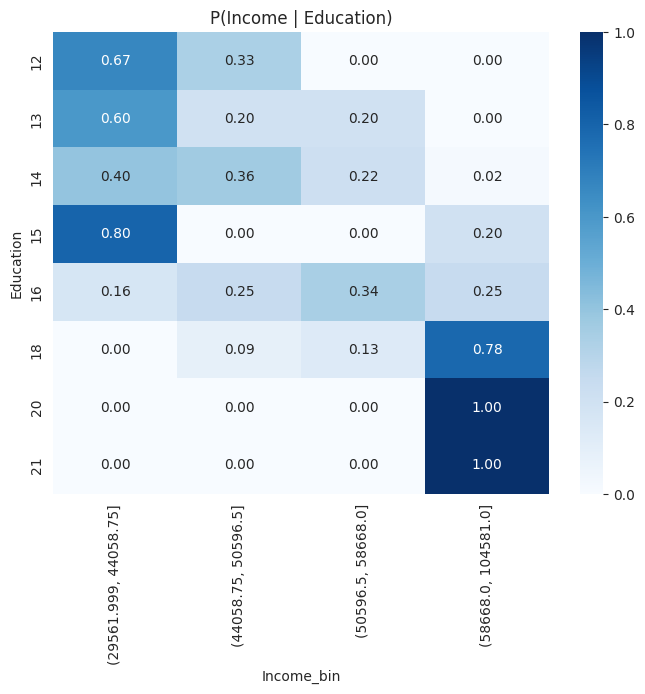

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cond_prob_income_edu, annot=True, cmap="Blues", fmt=".2f")
plt.title("P(Income | Education)")
plt.show()


### **Insights from the Conditional Probability Heatmap (P(Income | Education))**  

1. **Higher Education Levels Have a Wider Income Spread:**  
   - Lower education levels (12-15 years) are concentrated in lower-income bins, whereas higher education levels (18-21 years) dominate higher-income categories.  
   - Customers with **21 years of education** exclusively belong to the highest income bracket.  

2. **Middle Education Groups (16-18 Years) Have Diverse Income Ranges:**  
   - This segment has a balanced distribution across different income levels, making them potential targets for mid-range and premium Aerofit gym products.  

3. **Income Segmentation for Product Pricing:**  
   - Those with **12-15 years of education** primarily belong to lower and mid-income groups, indicating affordability concerns.  
   - Higher-income customers (18+ years of education) are more likely to afford **premium gym memberships, smart fitness equipment, and personal training services.**  

---

### **Recommendations for Aerofit Gym Products**  

🔹 **1. Tiered Product Offerings:**  
   - Introduce **budget-friendly gym plans & home fitness equipment** for customers with lower education levels (12-15 years).  
   - Offer **premium personal training services, high-end equipment, and digital fitness tracking** for highly educated and high-income customers.  

🔹 **2. Income-Based Membership Plans:**  
   - **Standard Plans** for lower-income segments, emphasizing affordability and basic fitness benefits.  
   - **Premium Memberships** for higher-income users, featuring advanced facilities like virtual coaching, AI-based fitness tracking, and wellness programs.  

🔹 **3. Targeted Marketing Strategies:**  
   - **University Students (Education 18+ Years)** → Offer flexible plans with student discounts to attract young, high-income users early.  
   - **Corporate Employees (Higher Education & Income Levels)** → Promote workplace fitness partnerships and premium plans.  

🔹 **4. Regional Pricing Adjustments:**  
   - If income and education levels vary across locations, **differentiated pricing and localized marketing campaigns** can improve adoption.  
